# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Notebook Presentation

In [ ]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [ ]:
df_apps = pd.read_csv('/content/drive/MyDrive/Data Analysis Project/Google Play Store Project/apps.csv')
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


# Data Cleaning

In [ ]:
df_apps.shape

(10841, 12)

In [ ]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [ ]:
df_apps.sample(n=5, random_state=1)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
4970,Free E B Garamond Cool Font,PERSONALIZATION,4.20,410,6.10,"100,000",Free,0,Everyone,Personalization,"April 20, 2018",4.0.3 and up
7351,Play Tube,VIDEO_PLAYERS,4.30,15874,5.40,"1,000,000",Free,0,Everyone,Video Players & Editors,"July 5, 2018",4.1 and up
6868,Canvas Student,EDUCATION,4.50,42828,6.95,"1,000,000",Free,0,Everyone,Education,"July 20, 2018",Varies with device
3407,Cards Casino:Video Poker & BJ,GAME,4.70,325,23.00,"10,000",Free,0,Teen,Casino,"May 8, 2015",2.3.3 and up
4324,Portes du Soleil,SPORTS,3.10,500,39.00,"50,000",Free,0,Everyone,Sports,"February 16, 2018",4.1 and up


### Drop Unused Columns

Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [ ]:
df_apps.drop(["Last_Updated", "Android_Ver"], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

Create a DataFrame called `df_apps_clean` that excludes all the NaN values in the Rating column.

In [ ]:
df_apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [ ]:
df_apps_clean = df_apps.dropna(subset=['Rating'])
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates
Finding duplicates in the dataframe df_apps_clean and remove the duplicates. Get the number of entries for the "Instagram" App.


In [ ]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [ ]:
df_apps_clean[df_apps_clean["App"]=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
df_apps_clean = df_apps_clean.drop_duplicates()
print(df_apps_clean[df_apps_clean.duplicated()].count().sum())
df_apps_clean.shape

0


(8891, 10)

In [ ]:
df_apps_clean[df_apps_clean["App"]=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
# need to specify the subset for indentifying duplicates
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps

Identify the highest rated apps. The problem we encountered if we rely exclusively on ratings alone to determine the quality of an app.

In [ ]:
# If we determine the quality of the app solely based on the rating, it does not tell much about the quality of the app. The app shouldn't be ranked the best
# just because one or a few reviewers are happy with it. Maybe it's new to the market.
df_apps_clean.sort_values("Rating", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

The size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, are there a limit in place or can developers make apps as large as they please?

In [ ]:
# 100MB, PostBanks
df_apps_clean.sort_values("Size_MBs", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [ ]:
# Facebook has the highest number of reviews and the top 50 apps are all FREE apps
df_apps_clean.sort_values("Reviews", ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [ ]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [ ]:
fig = px.pie(labels=ratings.index, values=ratings.values)

fig.show()

In [ ]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

In [ ]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type.

In [ ]:
df_apps_clean["Installs"].describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [ ]:
df_apps_clean["Installs"] = df_apps_clean["Installs"].replace(',', '', regex=True).astype(float)

In [ ]:
df_apps_clean.info()
df_apps_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   float64
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 704.6+ KB


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1.00,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1.00,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1.00,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5.00,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5.00,Free,0,Everyone,Medical


In [ ]:
df_apps_clean[df_apps_clean["Installs"]>= 1000000000]["App"].nunique()

20

In [ ]:
df_apps_clean[df_apps_clean["Installs"]== 1]["App"].nunique()

3

In [ ]:
df_apps_clean[["App", "Installs"]].groupby("Installs").count()

,App
Installs,
1.00,3
5.00,9
10.00,69
50.00,56
100.00,303
500.00,199
"1,000.00",698
"5,000.00",425
"10,000.00",988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [ ]:
df_apps_clean["Price"] = df_apps_clean["Price"].str.replace("$", "").astype(float)
df_apps_clean.info()
df_apps_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   float64
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   float64
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 704.6+ KB


<ipython-input-30-e305eebe0e05>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1.00,Free,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1.00,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1.00,Paid,0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5.00,Free,0.00,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5.00,Free,0.00,Everyone,Medical


In [ ]:
# I'm Rich - Trump Edition is the most expensive app, costing $400
df_apps_exp = df_apps_clean.sort_values('Price', ascending=False).head(20)
df_apps_exp

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,"10,000.00",Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,"1,000.00",Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,"50,000.00",Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,"5,000.00",Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,"10,000.00",Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,"100,000.00",Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,"1,000.00",Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,"5,000.00",Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,"10,000.00",Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,"5,000.00",Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [ ]:
df_apps_clean = df_apps_clean[df_apps_clean["Price"] <=250]

### Highest Grossing Paid Apps (ballpark estimate)

In [ ]:
# 3 of the Top 10 Highest Grossing Paid Apps are GAME
df_apps_clean["Revenue_Estimate"] = df_apps_clean["Price"] * df_apps_clean["Installs"]
df_apps_clean.sort_values('Revenue_Estimate', ascending=False).head(10)

<ipython-input-33-50f37ca484e0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,"10,000,000.00",Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,"10,000,000.00",Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,"1,000,000.00",Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,"1,000,000.00",Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,"1,000,000.00",Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,"1,000,000.00",Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,"500,000.00",Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,"1,000,000.00",Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,"1,000,000.00",Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,"1,000,000.00",Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [ ]:
top_10_category = df_apps_clean.Category.value_counts()[:10]
top_10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

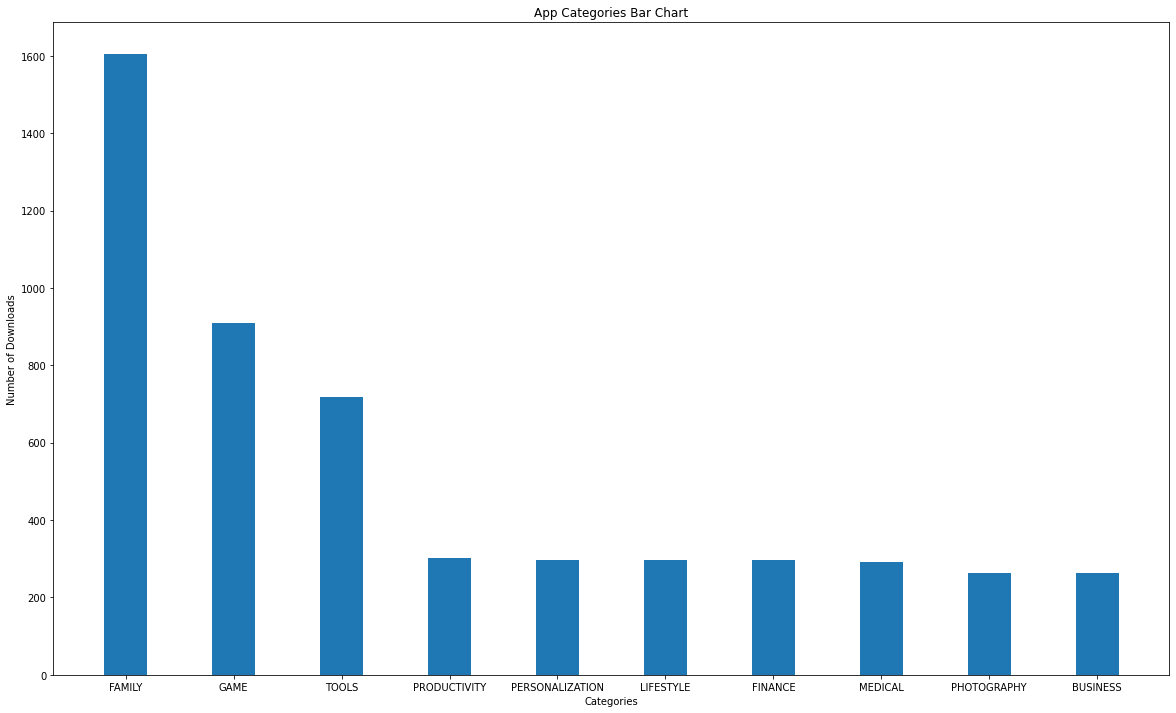

In [ ]:
plt.figure(figsize=(20,12))
plt.bar(top_10_category.index, # index = category name
             top_10_category.values,
             align='center', width=0.4)
 
plt.xlabel("Categories")
plt.ylabel("Number of Downloads")
plt.title("App Categories Bar Chart")

plt.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

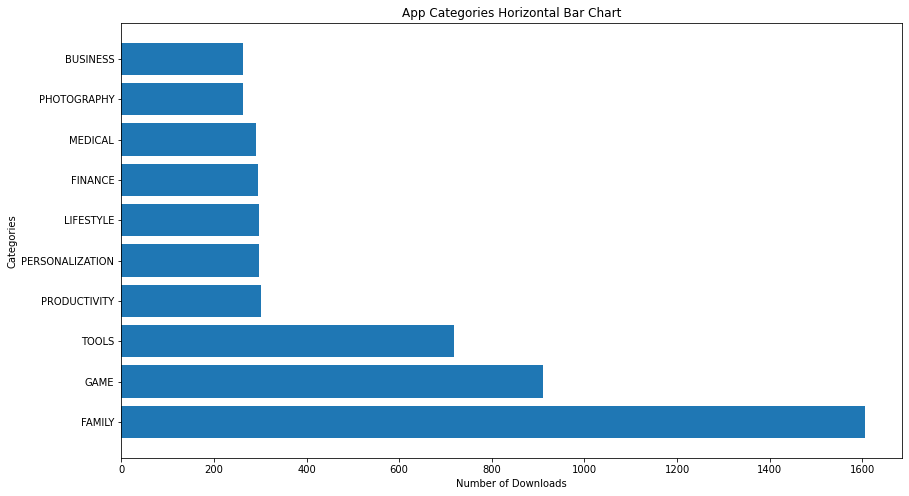

In [ ]:
plt.figure(figsize=(14,8))

# Create the bar chart
plt.barh(top_10_category.index, top_10_category.values,)

# Add labels and title
plt.ylabel("Categories")
plt.xlabel("Number of Downloads")
plt.title("App Categories Horizontal Bar Chart")

# Display the chart
plt.show()

### Category Concentration - Downloads vs. Competition


* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html) to create scatter plot.

<img src=https://imgur.com/cHsqh6a.png>


In [ ]:
new_df_apps = df_apps_clean.groupby("Category").agg(App=pd.NamedAgg(column='App', aggfunc='count'),
                                    Installs=pd.NamedAgg(column='Installs', aggfunc='sum'))

new_df_apps.sort_values('Installs', ascending=False)

,App,Installs
Category,,
GAME,910,"13,858,762,717.00"
COMMUNICATION,257,"11,039,241,530.00"
TOOLS,719,"8,099,724,500.00"
PRODUCTIVITY,301,"5,788,070,180.00"
SOCIAL,203,"5,487,841,475.00"
PHOTOGRAPHY,263,"4,649,143,130.00"
FAMILY,1606,"4,437,554,490.00"
VIDEO_PLAYERS,148,"3,916,897,200.00"
TRAVEL_AND_LOCAL,187,"2,894,859,300.00"


In [ ]:
scatter = px.scatter(new_df_apps, x="App", 
                 y="Installs", 
                 color="Installs", 
                 title="Category Concentration",
                 size='Installs',
                 hover_name=new_df_apps.index)

scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))

scatter.show()

# Extracting Nested Data from a Column

How many different types of genres are there? Can an app belong to more than one genre? 


In [ ]:
len(df_apps_clean)
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1.00,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1.00,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1.00,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5.00,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5.00,Free,0.00,Everyone,Medical,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,"1,000,000,000.00",Free,0.00,Everyone,Productivity,0.00
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000.00",Free,0.00,Teen,Video Players & Editors,0.00
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,"1,000,000,000.00",Free,0.00,Teen,Video Players & Editors,0.00
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,"1,000,000,000.00",Free,0.00,Teen,News & Magazines,0.00


In [ ]:
df_apps_clean.Genres.value_counts().sort_values(ascending=True)[:5]

Lifestyle;Pretend Play      1
Strategy;Education          1
Adventure;Education         1
Role Playing;Brain Games    1
Tools;Education             1
Name: Genres, dtype: int64

In [ ]:
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>
 

In [ ]:
bar = px.bar(
        x = num_genres.index[:15], # index = category name
        y = num_genres.values[:15], # count
        title='Top Genres',
        hover_name=num_genres.index[:15],
        color=num_genres.values[:15],
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Genre',
                  yaxis_title='Number of Apps',
                  coloraxis_showscale=False)

bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [ ]:
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [ ]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.sort_values('App')

,Category,Type,App
3,AUTO_AND_VEHICLES,Paid,1
24,FOOD_AND_DRINK,Paid,2
38,NEWS_AND_MAGAZINES,Paid,2
40,PARENTING,Paid,2
17,ENTERTAINMENT,Paid,2
...,...,...,...
31,LIFESTYLE,Free,284
21,FINANCE,Free,289
53,TOOLS,Free,656
25,GAME,Free,834


Use the plotly express bar chart examples to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>


In [ ]:
f_p_bar = px.bar(df_free_vs_paid,
                 x='Category',
                 y='App',
                 title="Free vs Paid Apps by Category",
                 color='Type',
                 barmode='group')

f_p_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'),
                    )

f_p_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?



In [ ]:
box = px.box(df_apps_clean, 
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?'
)

box.update_layout(yaxis=dict(type='log'))

box.show()


# Plotly Box Plots: Revenue by App Category

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

In [ ]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']

In [ ]:
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))


box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category
What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps.

In [ ]:
df_paid_apps.Price.median()

2.99

In [ ]:
box = px.box(df_paid_apps, 
             x='Category', 
             y="Price",
             title='Price per Category')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))


box.show()